# Take Home Exam 2
Semih KARACAOĞLU
<br>17050111008</br>
<br>CENG327</br>

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy import linalg
from scipy.io import mmread
from numpy.linalg import multi_dot
import matplotlib.pyplot as plt

# <u>DIRECT METHODS</u>

In [2]:
A = mmread('arc130.mtx')
A = pd.DataFrame(A.toarray())

A

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,1.000000e+00,-1.426527e-04,3.172130e-06,9.677615e-07,2.067174e-07,1.471342e-07,-0.000013,-4.186566e-05,-1.230297e-06,-7.543264e-09,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-6.310290e-07,1.000148e+00,-4.288838e-04,-1.245291e-06,-3.464035e-07,-1.266278e-07,-0.000163,-1.590017e-07,-1.238938e-12,-7.543264e-07,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.096666e-07,-5.613609e-06,1.050344e+00,-7.536840e-02,8.871006e-07,4.008211e-07,-0.000316,-1.589597e-07,-2.037324e-18,-1.508653e-06,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,6.421004e-08,4.753308e-07,-4.991767e-02,1.075374e+00,-1.004852e-03,1.813952e-06,-0.000524,-1.589597e-07,0.000000e+00,-2.539274e-06,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,3.956405e-09,-5.725276e-09,-9.393625e-08,-5.109401e-06,1.001007e+00,-1.041746e-03,-0.000114,-1.589597e-07,0.000000e+00,-5.087317e-07,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,7.172443e-31,-3.396618e-22,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.025157,0.000000,0.000000,0.000000,0.000000
126,0.000000e+00,1.614779e-29,-1.068201e-21,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.025157,0.000000,0.000000,0.000000
127,0.000000e+00,0.000000e+00,1.074942e-28,-2.483864e-21,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.025157,0.000000,0.000000
128,0.000000e+00,0.000000e+00,0.000000e+00,1.096037e-28,-5.090734e-21,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.025157,0.000000


In [3]:
A = A.to_numpy()

A

array([[ 1.00000041e+00, -1.42652731e-04,  3.17213016e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.31028968e-07,  1.00014787e+00, -4.28883824e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.09666553e-07, -5.61360866e-06,  1.05034356e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  1.07494179e-28, ...,
         1.02515740e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.02515741e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.02515741e+00]])

In [4]:
#transpose of A
A_transpose = np.transpose(A)

#creating 130x130 dimentional identity matrix 
I = np.identity(130)

In [5]:
#We perform the following operation to make A diagonally dominant and symmetric.

A = A + A_transpose + I

In [6]:
#creating b 130x1 dimentional vector that filled with 1's.

b = np.full((130, 1), 1)

In [7]:
def ULFactorization(A):
    
    num_row = A.shape[0]
    num_col = A.shape[1]
    
    #Check if the matrix is square, if not we raise an error
    if num_row != num_col:
        raise ValueError('Matrix have to be square')

    #Initially we create L and  U matrices which have same dimention with A matrix and fill them with 0's.
    U = np.zeros((num_row,num_col))
    L = np.zeros((num_row,num_col))
    
    #We fill the diagonal of U matrix with 1's.

    np.fill_diagonal(U,1)
    L[:] = A

    for m in range(num_row-1, 0, -1):
        x = L[m-1::-1, m] / L[m, m]
        U[m-1::-1, m] = x
        L[m-1::-1] -= x[:, np.newaxis] * L[m]

    #We wanted to find UL factorization so this method returns U and L respectively
    return (U, L)

In [8]:
U, L = ULFactorization(A)

In [9]:
# U.y = b

y = np.dot(np.linalg.inv(U),b)

In [10]:
#L.x = y

x = np.dot(np.linalg.inv(L),y)

In [11]:
x

array([[ 4.40560315e-01],
       [ 1.94642781e-01],
       [ 3.86975814e-01],
       [ 2.76192179e-01],
       [ 3.09860346e-01],
       [ 3.11307419e-01],
       [ 2.46194142e-01],
       [ 3.32346046e-01],
       [ 3.33226501e-01],
       [ 3.32903155e-01],
       [ 3.33108835e-01],
       [ 3.33387504e-01],
       [ 3.33178265e-01],
       [ 3.32671707e-01],
       [ 3.32968460e-01],
       [ 3.33333332e-01],
       [ 3.33224999e-01],
       [ 1.08016413e-01],
       [ 3.33297426e-01],
       [-6.75253772e-03],
       [-1.82549228e-05],
       [-1.57147699e-05],
       [-1.61203005e-05],
       [-2.17487176e-05],
       [-2.26414263e-05],
       [-5.26890332e-02],
       [ 3.07280533e-02],
       [ 4.89396252e-02],
       [-2.88923894e-02],
       [-3.08494494e-02],
       [-3.50276156e-02],
       [-8.90422381e-03],
       [ 5.56952909e-02],
       [-2.65477734e-02],
       [-2.75755909e-02],
       [-6.43983857e-02],
       [-6.76269739e-02],
       [ 4.79659388e-02],
       [-2.1

In [12]:
#built-in function result to compare my outcome
X = linalg.solve(A, b)

In [13]:
#exactly same with mine

X

array([[ 4.40560315e-01],
       [ 1.94642781e-01],
       [ 3.86975814e-01],
       [ 2.76192179e-01],
       [ 3.09860346e-01],
       [ 3.11307419e-01],
       [ 2.46194142e-01],
       [ 3.32346046e-01],
       [ 3.33226501e-01],
       [ 3.32903155e-01],
       [ 3.33108835e-01],
       [ 3.33387504e-01],
       [ 3.33178265e-01],
       [ 3.32671707e-01],
       [ 3.32968460e-01],
       [ 3.33333332e-01],
       [ 3.33224999e-01],
       [ 1.08016413e-01],
       [ 3.33297426e-01],
       [-6.75253772e-03],
       [-1.82549228e-05],
       [-1.57147699e-05],
       [-1.61203005e-05],
       [-2.17487176e-05],
       [-2.26414263e-05],
       [-5.26890332e-02],
       [ 3.07280533e-02],
       [ 4.89396252e-02],
       [-2.88923894e-02],
       [-3.08494494e-02],
       [-3.50276156e-02],
       [-8.90422381e-03],
       [ 5.56952909e-02],
       [-2.65477734e-02],
       [-2.75755909e-02],
       [-6.43983857e-02],
       [-6.76269739e-02],
       [ 4.79659388e-02],
       [-2.1

<hr style="border:2px solid gray"> </hr>

# <u>ITERATIVE METHODS</u>

In [14]:
A = mmread('arc130.mtx')
A = pd.DataFrame(A.toarray())

A

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,1.000000e+00,-1.426527e-04,3.172130e-06,9.677615e-07,2.067174e-07,1.471342e-07,-0.000013,-4.186566e-05,-1.230297e-06,-7.543264e-09,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-6.310290e-07,1.000148e+00,-4.288838e-04,-1.245291e-06,-3.464035e-07,-1.266278e-07,-0.000163,-1.590017e-07,-1.238938e-12,-7.543264e-07,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,2.096666e-07,-5.613609e-06,1.050344e+00,-7.536840e-02,8.871006e-07,4.008211e-07,-0.000316,-1.589597e-07,-2.037324e-18,-1.508653e-06,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,6.421004e-08,4.753308e-07,-4.991767e-02,1.075374e+00,-1.004852e-03,1.813952e-06,-0.000524,-1.589597e-07,0.000000e+00,-2.539274e-06,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,3.956405e-09,-5.725276e-09,-9.393625e-08,-5.109401e-06,1.001007e+00,-1.041746e-03,-0.000114,-1.589597e-07,0.000000e+00,-5.087317e-07,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,7.172443e-31,-3.396618e-22,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,1.025157,0.000000,0.000000,0.000000,0.000000
126,0.000000e+00,1.614779e-29,-1.068201e-21,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.025157,0.000000,0.000000,0.000000
127,0.000000e+00,0.000000e+00,1.074942e-28,-2.483864e-21,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.025157,0.000000,0.000000
128,0.000000e+00,0.000000e+00,0.000000e+00,1.096037e-28,-5.090734e-21,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.025157,0.000000


In [15]:
#transpose of A
A_transpose = np.transpose(A)

#creating 130x130 dimentional identity matrix 
I = np.identity(130)

In [16]:
#We perform the following operation to make A diagonally dominant and symmetric.

A = A + A_transpose + I

In [17]:
#creating b 130x1 dimentional vector that filled with 1's.

b = np.full((130, 1), 1)

In [18]:
A

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,3.000001e+00,-1.432838e-04,3.381797e-06,1.031972e-06,2.106738e-07,1.477537e-07,-0.000013,-4.192204e-05,-1.286676e-06,-7.543264e-09,...,3.764561e-29,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.172443e-31,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,-1.432838e-04,3.000296e+00,-4.344974e-04,-7.699603e-07,-3.521288e-07,-1.443654e-07,-0.000163,-2.153807e-07,-5.638020e-08,-7.543264e-07,...,-2.284276e-21,7.695760e-28,0.000000e+00,0.000000e+00,0.000000e+00,-3.396618e-22,1.614779e-29,0.000000e+00,0.000000e+00,0.000000e+00
2,3.381797e-06,-4.344974e-04,3.100687e+00,-1.252861e-01,7.931643e-07,3.708669e-07,-0.000316,-2.153387e-07,-5.637897e-08,-1.508653e-06,...,0.000000e+00,-6.857663e-21,4.662923e-27,0.000000e+00,0.000000e+00,0.000000e+00,-1.068201e-21,1.074942e-28,0.000000e+00,0.000000e+00
3,1.031972e-06,-7.699603e-07,-1.252861e-01,3.150748e+00,-1.009961e-03,1.697624e-06,-0.000524,-2.153387e-07,-5.637897e-08,-2.539274e-06,...,0.000000e+00,0.000000e+00,-1.524029e-20,4.334547e-27,0.000000e+00,0.000000e+00,0.000000e+00,-2.483864e-21,1.096037e-28,0.000000e+00
4,2.106738e-07,-3.521288e-07,7.931643e-07,-1.009961e-03,3.002015e+00,-1.044974e-03,-0.000114,-2.153387e-07,-5.637894e-08,-5.087317e-07,...,0.000000e+00,0.000000e+00,0.000000e+00,-2.986854e-20,3.380210e-27,0.000000e+00,0.000000e+00,0.000000e+00,-5.090734e-21,9.355154e-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,7.172443e-31,-3.396618e-22,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.050315e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
126,0.000000e+00,1.614779e-29,-1.068201e-21,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.050315e+00,0.000000e+00,0.000000e+00,0.000000e+00
127,0.000000e+00,0.000000e+00,1.074942e-28,-2.483864e-21,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.050315e+00,0.000000e+00,0.000000e+00
128,0.000000e+00,0.000000e+00,0.000000e+00,1.096037e-28,-5.090734e-21,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.050315e+00,0.000000e+00


In [19]:
A = np.array(A)

In [20]:
def jacobi(A, b, numIter, P_initial):
    
    a = []
    x = []
    P = []
    
    n = A.shape[0]
    
#     P_initial = np.zeros(n)
#     P_initial = [0, 0.1, -0.1]
    temp = 0
    
    P.append(P_initial)
    
    for k in range(numIter):
        for i in range(n):
            for j in range(n):
                if j!=i:
                    if(A[i,j]*P[k][j]!=0):
                        temp += A[i,j]*P[k][j]
                    else:
                        temp+=0
            a.append((b[i]-temp)/A[i,i])
            temp=0        
        P.append(a)
        a = []
        
    return P[-1]

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

### <u>A Short Demo with the Example of Jacobi in the Lecture</u>

In [21]:
b1 = np.array([[0],[0.5],[0]])

In [22]:
P_initial_1 = [0, 0.1, -0.1]

In [23]:
A1 = np.array([[2,1,1],[1,3,1],[1,1,2.5]])

##### It gives exactly same result with the iteration of the example in the lecture

In [24]:
for t in range(20):
    P1 = jacobi(A1, b1, t, P_initial_1)
    
    
    print(P1) 

[0, 0.1, -0.1]
[array([0.]), array([0.2]), array([-0.04])]
[array([-0.08]), array([0.18]), array([-0.08])]
[array([-0.05]), array([0.22]), array([-0.04])]
[array([-0.09]), array([0.19666667]), array([-0.068])]
[array([-0.06433333]), array([0.21933333]), array([-0.04266667])]
[array([-0.08833333]), array([0.20233333]), array([-0.062])]
[array([-0.07016667]), array([0.21677778]), array([-0.0456])]
[array([-0.08558889]), array([0.20525556]), array([-0.05864444])]
[array([-0.07330556]), array([0.21474444]), array([-0.04786667])]
[array([-0.08343889]), array([0.20705741]), array([-0.05657556])]
[array([-0.07524093]), array([0.21333815]), array([-0.04944741])]
[array([-0.08194537]), array([0.20822944]), array([-0.05523889])]
[array([-0.07649528]), array([0.21239475]), array([-0.05051363])]
[array([-0.08094056]), array([0.20900297]), array([-0.05435979])]
[array([-0.07732159]), array([0.21176678]), array([-0.05122496])]
[array([-0.08027091]), array([0.20951552]), array([-0.05377808])]
[array(

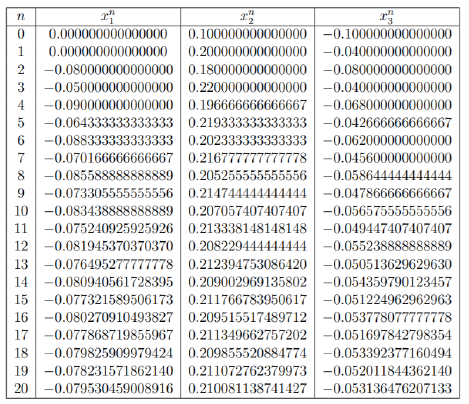

In [25]:
from IPython.display import Image

#Above result in the demo is exactly same with below one. This screenshot is from Jacobi Iteration in the lecture. 
Image('Screenshot_1.png') 

<hr style="border:2px solid gray"> </hr>
<hr style="border:2px solid gray"> </hr>

In [26]:
#In P_initial, number of 0's are 130. Because, A is a 130x130 matrix.

P_initial = np.zeros(A.shape[0])

In [27]:
x_jacobi = jacobi(A,b,4,P_initial)
x_jacobi

[array([-2.64016953e+09]),
 array([3.58249567e+09]),
 array([-8.75331348e+08]),
 array([-6.37876384e+08]),
 array([3.32587953e+08]),
 array([2.08086201e+08]),
 array([13178676.75744309]),
 array([155720.83558889]),
 array([-7145.55755033]),
 array([46116.33299124]),
 array([12940683.74098243]),
 array([38.66644667]),
 array([-3.01892697]),
 array([1542.09780874]),
 array([67.01348111]),
 array([0.57383781]),
 array([6265.18792515]),
 array([36501723.50661109]),
 array([-0.43935645]),
 array([3.45979642e+11]),
 array([5.34815005e+14]),
 array([7.94088246e+14]),
 array([3.38707771e+14]),
 array([4.7798154e+14]),
 array([4.39211175e+14]),
 array([2.20311264e+13]),
 array([4.14476519e+13]),
 array([2.49362613e+13]),
 array([2.38767062e+13]),
 array([2.26564284e+13]),
 array([1.80404357e+13]),
 array([4.35465376e+13]),
 array([2.49123947e+13]),
 array([2.26072337e+13]),
 array([2.20684143e+13]),
 array([1.69527956e+13]),
 array([4.49654308e+13]),
 array([2.52444767e+13]),
 array([2.21604123

In [28]:
x_exact = linalg.solve(A, b)
x_exact

array([[ 4.40560315e-01],
       [ 1.94642781e-01],
       [ 3.86975814e-01],
       [ 2.76192179e-01],
       [ 3.09860346e-01],
       [ 3.11307419e-01],
       [ 2.46194142e-01],
       [ 3.32346046e-01],
       [ 3.33226501e-01],
       [ 3.32903155e-01],
       [ 3.33108835e-01],
       [ 3.33387504e-01],
       [ 3.33178265e-01],
       [ 3.32671707e-01],
       [ 3.32968460e-01],
       [ 3.33333332e-01],
       [ 3.33224999e-01],
       [ 1.08016413e-01],
       [ 3.33297426e-01],
       [-6.75253772e-03],
       [-1.82549228e-05],
       [-1.57147699e-05],
       [-1.61203005e-05],
       [-2.17487176e-05],
       [-2.26414263e-05],
       [-5.26890332e-02],
       [ 3.07280533e-02],
       [ 4.89396252e-02],
       [-2.88923894e-02],
       [-3.08494494e-02],
       [-3.50276156e-02],
       [-8.90422381e-03],
       [ 5.56952909e-02],
       [-2.65477734e-02],
       [-2.75755909e-02],
       [-6.43983857e-02],
       [-6.76269739e-02],
       [ 4.79659388e-02],
       [-2.1

In [29]:
norm = np.linalg.norm((x_jacobi-x_exact), ord = 1)

norm

5170452863841658.0

In [30]:
for v in range(5):
    x_jacobi[v] = jacobi(A,b,v,P_initial)

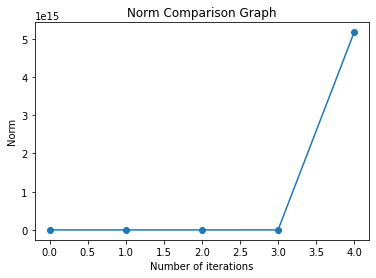

In [31]:
norm_arr = []

for u in range(5):
    norm_arr.append(np.linalg.norm((x_jacobi[u]-x_exact), ord = 1))

num_iter = [0,1,2,3,4]
# plotting the points
plt.plot(num_iter[:], norm_arr[:])
plt.scatter(num_iter[:], norm_arr[:]) 

# naming the x axis
plt.xlabel('Number of iterations')
# naming the y axis
plt.ylabel('Norm')
 
# giving a title to my graph
plt.title('Norm Comparison Graph')
 
# function to show the plot
plt.show()